In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

uint8
(450, 700)
42
149.57829523809525
40.59556160760243


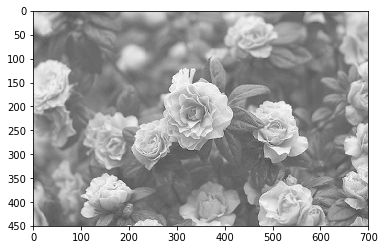

In [3]:
#fName = "tissue.png"
#fName = "micro.png"
fName = "flower.jpg"

I = imageio.imread(fName)
if len(I.shape) > 2:
    I = I[:,:,0]
print(I.dtype)
print(I.shape)

print(I.min())
print(I.mean())
print(I.std())

plt.imshow(I, cmap='gray', vmin=0, vmax=255)

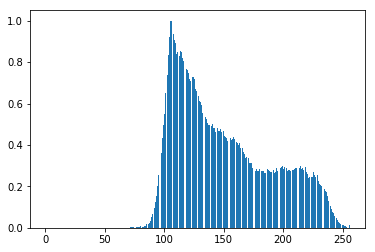

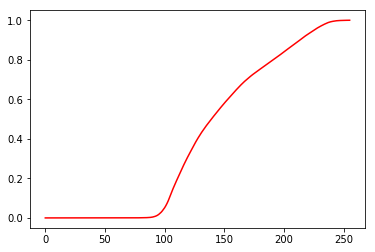

In [4]:
hist, bins = np.histogram(I, bins=256, range=[0,256])
#
# 1. Write your own code to compute the histogram of an image 
# to replace the above line of statement
#
# Initialize
#
# hist = np.zeros(256,)
# ??????
#
# bins = np.arange(257)
#

cdf = np.cumsum(hist)

height, width = I.shape
norm_cum_hist = cdf / (height * width)
norm_hist = hist / hist.max()

#width = (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, norm_hist, align='center')
plt.plot(norm_cum_hist, color='r')
plt.show()

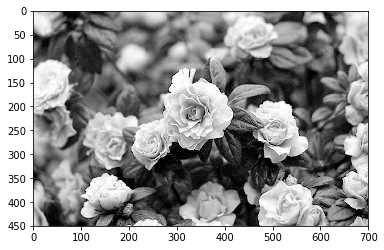

In [4]:
#cdf_min = cdf / 4 * 3
cdf_min = 1
L = 256
hists_cdf = ((cdf - cdf_min)/(height * width - cdf_min) * (L - 1)).astype("uint8")

# mapping
img_eq = hists_cdf[I]
plt.imshow(img_eq, cmap='gray')

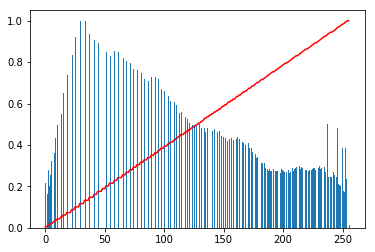

In [5]:
#
# 2. Show the equalized histogram and 
#    Cumulative Distribution Function (CDF)
#
hist, bins = np.histogram(img_eq, bins=256, range=[0,256])

cdf = np.cumsum(hist)
norm_cum_hist = cdf / (height * width)
norm_hist = hist / hist.max()

center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, norm_hist, align='center')
plt.plot(norm_cum_hist, color='r')
plt.show()